# Helper

In [1]:
from split_test_5s import *
from plot_multilabel_stats import *

In [2]:
def get_unique_multilabel_labels(multilabel_labels: list) -> list:
    unique_labels = []
    for sample_labels in multilabel_labels:
        for label in sample_labels:
            if label not in unique_labels:
                unique_labels.append(label)
    return unique_labels

def count_multilabel_occurences(multilabel_labels: list) -> list:
    label_occurences = {}
    for sample_codes in multilabel_labels:
        for code in sample_codes:
            label_occurences[code] = label_occurences.get(code, 0) + 1
    return label_occurences

def get_multilabel_stats(multilabel_labels: list) -> tuple[list, dict]:
    unique_labels = []
    label_occurences = {}
    for sample_labels in multilabel_labels:
        for label in sample_labels:
            if label not in unique_labels:
                unique_labels.append(label)
            label_occurences[label] = label_occurences.get(label, 0) + 1
    return unique_labels, label_occurences

def show_multilabel_stats(dataset_dict: DatasetDict, figwidth: int=10):
    train_set = dataset_dict["train"]
    test_set = dataset_dict["test"]

    unique_train_labels, train_label_occurences = get_multilabel_stats(train_set["ebird_code_multilabel"])
    unique_test_labels, test_label_occurences = get_multilabel_stats(test_set["ebird_code_multilabel"])

    unique_labels_in_dataset = set(unique_train_labels).union(set(unique_test_labels))

    for label in unique_labels_in_dataset:
        # fill missing labels with occurence count of 0
        train_label_occurences[label] = train_label_occurences.get(label, 0)
        test_label_occurences[label] = test_label_occurences.get(label, 0)

    print(f"Unique labels in dataset: {len(unique_labels_in_dataset)}")
    print(f"Unique labels in train set vs. test set:  {len(unique_train_labels)} vs. {len(unique_test_labels)}")

    label_occurences = sorted(train_label_occurences.items())
    labels, train_label_counts = zip(*label_occurences)
    label_occurences = sorted(test_label_occurences.items())
    labels, test_label_counts = zip(*label_occurences)

    fig, ax = plt.subplots()
    fig.set_figwidth(figwidth)
    width = 0.8

    ax.set_xticks(labels, labels=labels)

    ax.bar(labels, train_label_counts, label="train_set", width=width)
    ax.bar(labels, test_label_counts, label="test_set",width=width, bottom=train_label_counts)
    ax.set_xlabel("Bird Code")
    ax.set_ylabel("Occurence count")
    ax.legend()
    plt.show()

def show_multilabel_percentages(dataset_dict: DatasetDict, figwidth: int=10):
    train_set = dataset_dict["train"]
    test_set = dataset_dict["test"]

    unique_train_labels, train_label_occurences = get_multilabel_stats(train_set["ebird_code_multilabel"])
    unique_test_labels, test_label_occurences = get_multilabel_stats(test_set["ebird_code_multilabel"])

    unique_labels_in_dataset = set(unique_train_labels).union(set(unique_test_labels))

    for label in unique_labels_in_dataset:
        # fill missing labels with occurence count of 0
        train_label_occurences[label] = train_label_occurences.get(label, 0)
        test_label_occurences[label] = test_label_occurences.get(label, 0)

    print(f"Unique labels in dataset: {len(unique_labels_in_dataset)}")
    print(f"Unique labels in train set vs. test set:  {len(unique_train_labels)} vs. {len(unique_test_labels)}")

    for label in unique_labels_in_dataset:
        occurence_count_sum = train_label_occurences[label] + test_label_occurences[label]
        train_label_occurences[label] = train_label_occurences[label] / occurence_count_sum
        test_label_occurences[label] = test_label_occurences[label] / occurence_count_sum

    label_occurences = sorted(train_label_occurences.items())
    labels, train_label_counts = zip(*label_occurences)
    label_occurences = sorted(test_label_occurences.items())
    labels, test_label_counts = zip(*label_occurences)

    fig, ax = plt.subplots()
    fig.set_figwidth(figwidth)
    width = 0.8

    ax.set_xticks(labels, labels=labels)

    ax.bar(labels, train_label_counts, label="train_set", width=width)
    ax.bar(labels, test_label_counts, label="test_set",width=width, bottom=train_label_counts)
    ax.set_xlabel("Bird Code")
    ax.set_ylabel("Percentage per set")
    ax.legend()
    plt.show()

# NES

In [3]:
dataset = get_dataset("NES_scape")
test_5s = dataset["test_5s"]
print(dataset)
next(iter(test_5s))

c:\Users\feier\miniconda3\envs\birdset\lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


DatasetDict({
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 6952
    })
    test_5s: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 24480
    })
})


{'audio': {'bytes': None,
  'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\NES_scape\\downloads\\extracted\\35644542a0998491c586fd647ca3e015195cd45c9d8ca749e7fc4dbb61bd5e79\\NES_001_S01_20190914_043000_000_005.ogg'},
 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\NES_scape\\downloads\\extracted\\35644542a0998491c586fd647ca3e015195cd45c9d8ca749e7fc4dbb61bd5e79\\NES_001_S01_20190914_043000_000_005.ogg',
 'start_time': 0.0,
 'end_time': 5.0,
 'low_freq': None,
 'high_freq': None,
 'ebird_code': None,
 'ebird_code_multilabel': [],
 'ebird_code_secondary': None,
 'call_type': None,
 'sex': None,
 'lat': 5.59,
 'long': -75.85,
 'length': None,
 'microphone': 'Soundscape',
 'license': 'Creative Commons Attribution 4.0 International Public License',
 'source': 'https://zenodo.org/record/7525349',
 'local_time': '4:30:29',
 'detected_events': None,
 'event_cluster': None,
 'peaks': None,
 'quality': None,
 'recordist': None}

In [4]:
split_into_k_datasets(test_5s, 5)

[DatasetDict({
     train: Dataset({
         features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
         num_rows: 19440
     })
     test: Dataset({
         features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
         num_rows: 5040
     })
 }),
 DatasetDict({
     train: Dataset({
         features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length

# UHH

In [5]:
dataset = get_dataset("UHH_scape")
test_5s = dataset["test_5s"]
print(dataset)
next(iter(test_5s))

c:\Users\feier\miniconda3\envs\birdset\lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


DatasetDict({
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 59583
    })
    test_5s: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 36637
    })
})


{'audio': {'bytes': None,
  'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\UHH_scape\\downloads\\extracted\\a39fd4590182df6876811d8e287d9479e4bec4a72763eac481048068f2595c09\\UHH_001_S01_20161121_150000_000_005.ogg'},
 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\UHH_scape\\downloads\\extracted\\a39fd4590182df6876811d8e287d9479e4bec4a72763eac481048068f2595c09\\UHH_001_S01_20161121_150000_000_005.ogg',
 'start_time': 0.0,
 'end_time': 5.0,
 'low_freq': None,
 'high_freq': None,
 'ebird_code': None,
 'ebird_code_multilabel': [],
 'ebird_code_secondary': None,
 'call_type': None,
 'sex': None,
 'lat': 19.801668,
 'long': -155.609444,
 'length': None,
 'microphone': 'Soundscape',
 'license': 'Creative Commons Attribution 4.0 International Public License',
 'source': 'https://zenodo.org/record/7078499',
 'local_time': '15:00:06',
 'detected_events': None,
 'event_cluster': None,
 'peaks': None,
 'quality': None,
 'recordist': None}

In [6]:
def get_site_comparison(path: str) -> str:
    site = cut_underscores(path, 4)
    site = site[-3:]
    return site

def get_file_comparison_name(path :str) -> str:
    path = cut_underscores(path, 2)
    return path

tmp = split_into_k_datasets_with_sites(test_5s, 5, get_site_comparison, get_file_comparison_name)

Unique labels in dataset: 27
Unique labels in train set vs. test set:  25 vs. 22


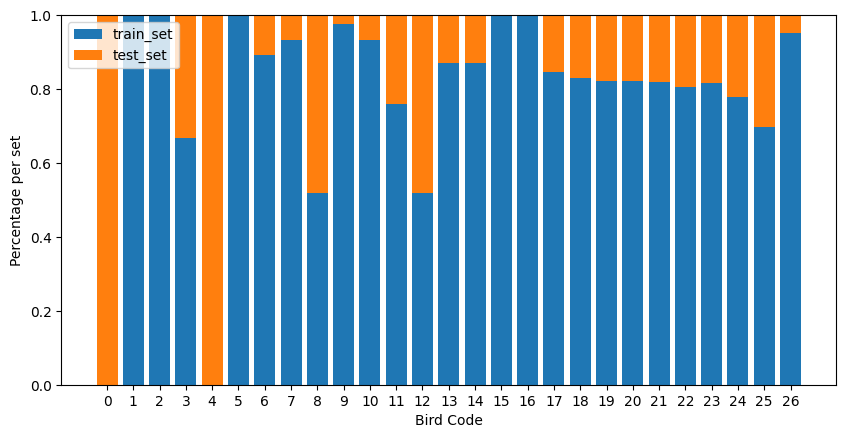

Unique labels in dataset: 27
Unique labels in train set vs. test set:  27 vs. 18


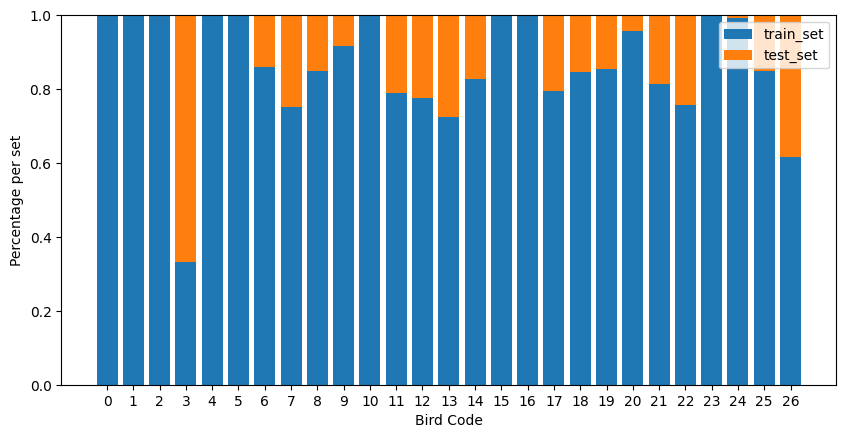

Unique labels in dataset: 27
Unique labels in train set vs. test set:  27 vs. 18


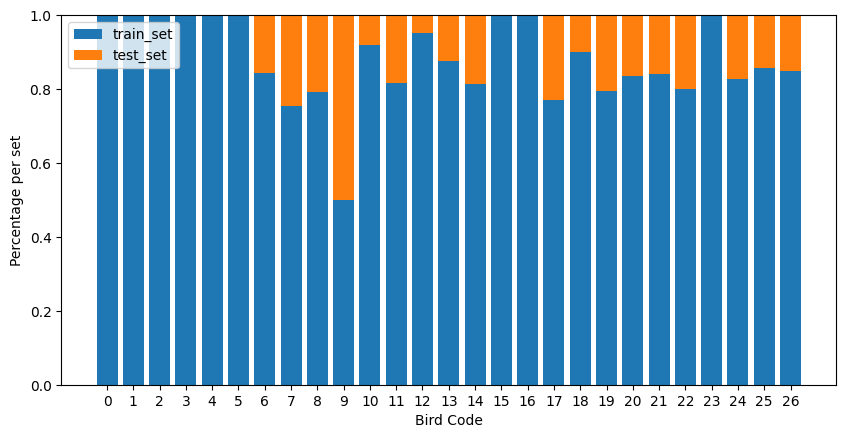

Unique labels in dataset: 27
Unique labels in train set vs. test set:  27 vs. 16


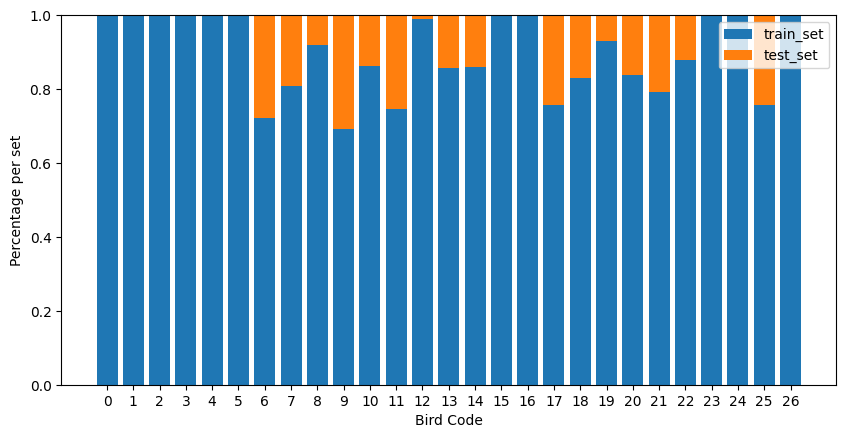

Unique labels in dataset: 27
Unique labels in train set vs. test set:  22 vs. 24


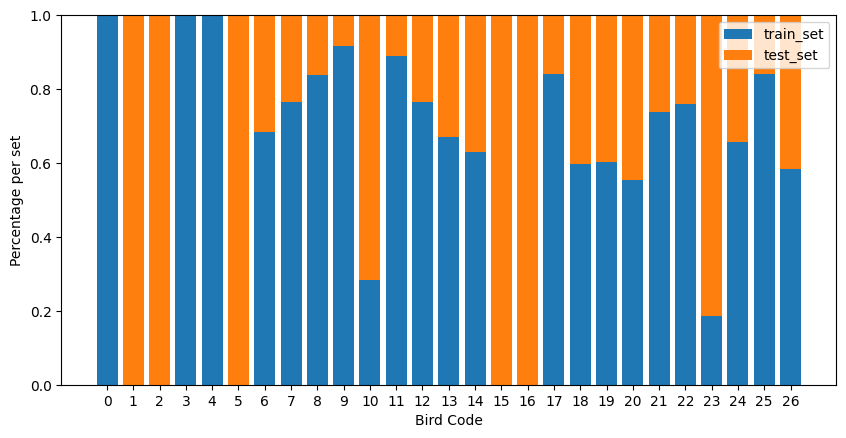

In [7]:
for dataset_dict in tmp:
    show_multilabel_percentages(dataset_dict)